In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Trend

In [3]:
import matplotlib.pyplot as plt

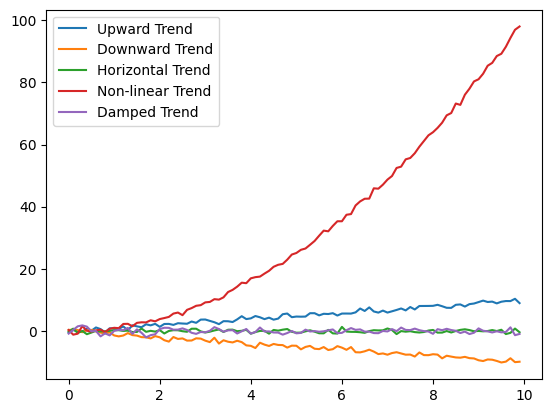

In [4]:
# Upward trend
t = np.arange(0,10,0.1)
data = t + np.random.normal(0, 0.5, len(t))
plt.plot(t, data, label = 'Upward Trend')

# Downward Trend
t = np.arange(0,10,0.1)
data = -t + np.random.normal(0, 0.5, len(t))
plt.plot(t, data, label = 'Downward Trend')

# Horizontal Trend
t = np.arange(0, 10, 0.1)
data = np.zeros(len(t)) + np.random.normal(0, 0.5, len(t))
plt.plot(t, data, label ='Horizontal Trend')

# Non-linear Trend
t = np.arange(0, 10, 0.1)
data = t**2 + np.random.normal(0,0.5,len(t))
plt.plot(t, data, label = 'Non-linear Trend')

# Damped Trend
t = np.arange(0, 10, 0.1)
data = np.exp(-0.1*t) * np.sin(2*np.pi*t)\
        + np.random.normal(0, 0.5, len(t))
plt.plot(t, data, label='Damped Trend')

plt.legend()
plt.show()

# Seasonality

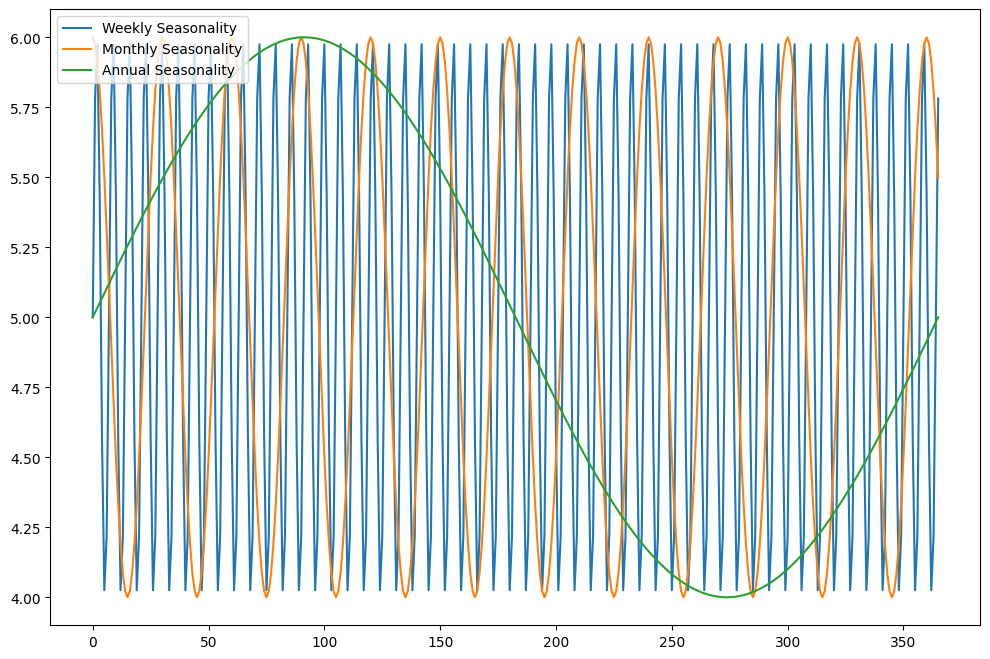

In [5]:
np.random.seed(1)
time = np.arange(0,366)

# weekly seasonality
week_seasonality = np.sin(2*np.pi*time/7)
week_data = 5 + week_seasonality

# monthly seasonality
month_seasonality = np.cos(2*np.pi*time/30)
month_data = 5 + month_seasonality

# annually seasonality
annual_seasonality = np.sin(2*np.pi*time/365)
annual_data = 5 + annual_seasonality

plt.figure(figsize=(12, 8))
plt.plot(time, week_data,
         label='Weekly Seasonality')
plt.plot(time, month_data,
         label='Monthly Seasonality')
plt.plot(time, annual_data,
         label='Annual Seasonality')
plt.legend(loc='upper left')
plt.show()

# Cyclicity

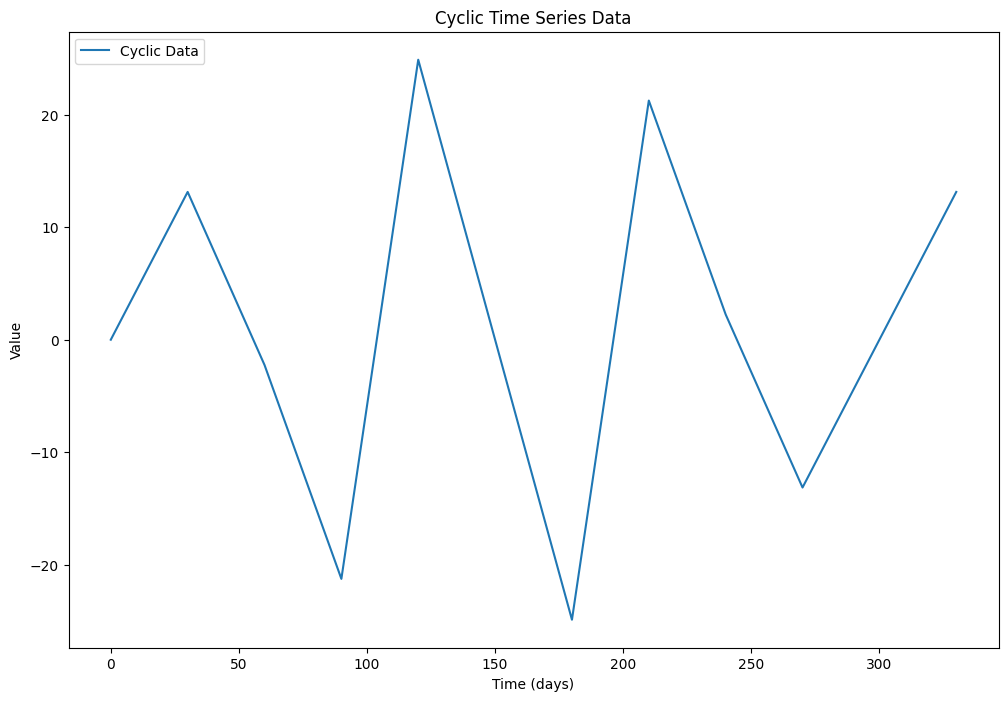

In [6]:
np.random.seed(1)
time = np.array([0,30,60,90,120,150,180,210,240,270,300,330])
data = 10*np.sin(2* np.pi*time/50)\
        + 20*np.sin(2*np.pi*time/100)

plt.figure(figsize = (12,8))
plt.plot(time,data,label = 'Cyclic Data')
plt.legend(loc='upper left')
plt.xlabel('Time (days)')
plt.ylabel('Value')
plt.title('Cyclic Time Series Data')
plt.show()

# Irregularities(noise)

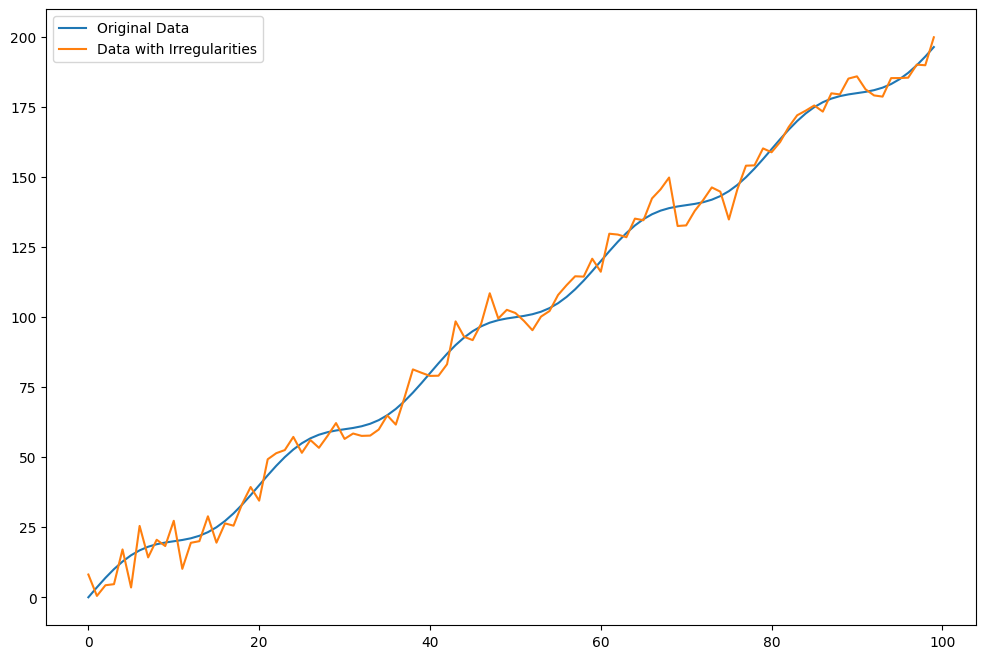

In [7]:
np.random.seed(1)
time = np.arange(0,100)
data = 5*np.sin(2*np.pi*time/20)+2*time
noise = np.random.normal(0,5, len(data))
noise_data = data + noise
plt.figure(figsize=(12, 8))
plt.plot(time, data, label='Original Data')
plt.plot(time, noise_data,
         label='Data with Irregularities')
plt.legend(loc='upper left')
plt.show()

# Check if Time Series Data is Stationary

In [8]:
data = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv', header=0, index_col=0)

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121
1949-06          135
1949-07          148
1949-08          148
1949-09          136
1949-10          119


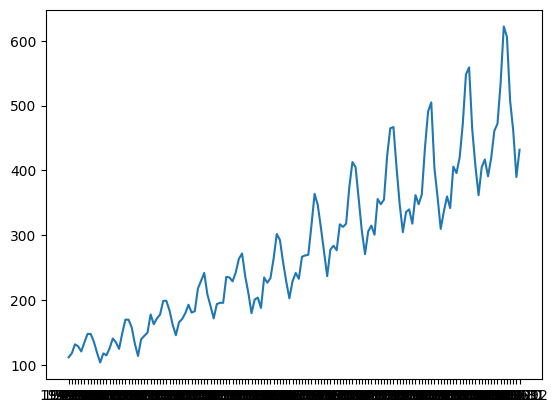

In [9]:
print(data.head(10))
plt.plot(data)

In [10]:
values = data.values
parts = int(len(values)/3)
part1, part2, part3 = values[0:parts], values[parts: (parts*2)], values[(parts*2):(parts*3)]
mean1, mean2, mean3 = part1.mean(), part2.mean(), part3.mean()
var1, var2, var3 = part1.var(), part2.var(), part3.var()

print('mean1=%f, mean2=%f, mean3=%f' % (mean1, mean2, mean3))
print('var1=%f, var2=%f, var3=%f' % (var1, var2, var3))

mean1=158.375000, mean2=269.041667, mean3=413.479167
var1=1071.859375, var2=3041.289931, var3=6033.624566


[[4.71849887]
 [4.77068462]
 [4.88280192]
 [4.8598124 ]
 [4.79579055]
 [4.90527478]
 [4.99721227]
 [4.99721227]
 [4.91265489]
 [4.77912349]
 [4.6443909 ]
 [4.77068462]
 [4.74493213]
 [4.83628191]
 [4.94875989]]


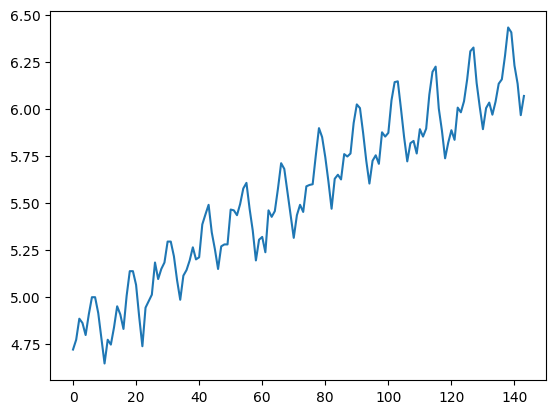

In [11]:
values_log = np.log(data.values)
print(values_log[0:15])
plt.plot(values_log)

In [12]:
parts = int(len(values_log)/3)
part1, part2, part3 = values_log[0:parts], values_log[parts: (parts*2)], values_log[(parts*2):(parts*3)]
mean1, mean2, mean3 = part1.mean(), part2.mean(), part3.mean()
var1, var2, var3 = part1.var(), part2.var(), part3.var()

print('mean1=%f, mean2=%f, mean3=%f' % (mean1, mean2, mean3))
print('var1=%f, var2=%f, var3=%f' % (var1, var2, var3))

mean1=5.043911, mean2=5.574733, mean3=6.007884
var1=0.042007, var2=0.039668, var3=0.032704


In [13]:
# Augumented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

In [14]:
res = adfuller(values)
print("Augumented Dickey_fuller Statistic:%f" % res[0])
print('p-value:%f' % res[1])

print('critical values of different values:')
for k, v in res[4].items():
    print('\t%s:%.3f' % (k,v))

Augumented Dickey_fuller Statistic:0.815369
p-value:0.991880
critical values of different values:
	1%:-3.482
	5%:-2.884
	10%:-2.579


In [15]:
res_log = adfuller(values_log)
print("Augumented Dickey_fuller Statistic:%f" % res_log[0])
print('p-value:%f' % res_log[1])

print('critical values of different values:')
for k, v in res_log[4].items():
    print('\t%s:%.3f' % (k,v))

Augumented Dickey_fuller Statistic:-1.717017
p-value:0.422367
critical values of different values:
	1%:-3.482
	5%:-2.884
	10%:-2.579


**Hence the data is highly non-stationary**

# Seasonal Adjustment and Differencing

In [16]:
df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')

In [17]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

In [18]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [19]:
import statsmodels.api as sm

In [20]:
# Seasonal Adjustment
result = sm.tsa.seasonal_decompose(df['#Passengers'], model = 'multiplicative', period = 12)
df['Seasonal Adjusted'] = result.resid

# Differencing
df['Differenced'] = df['#Passengers'].diff()


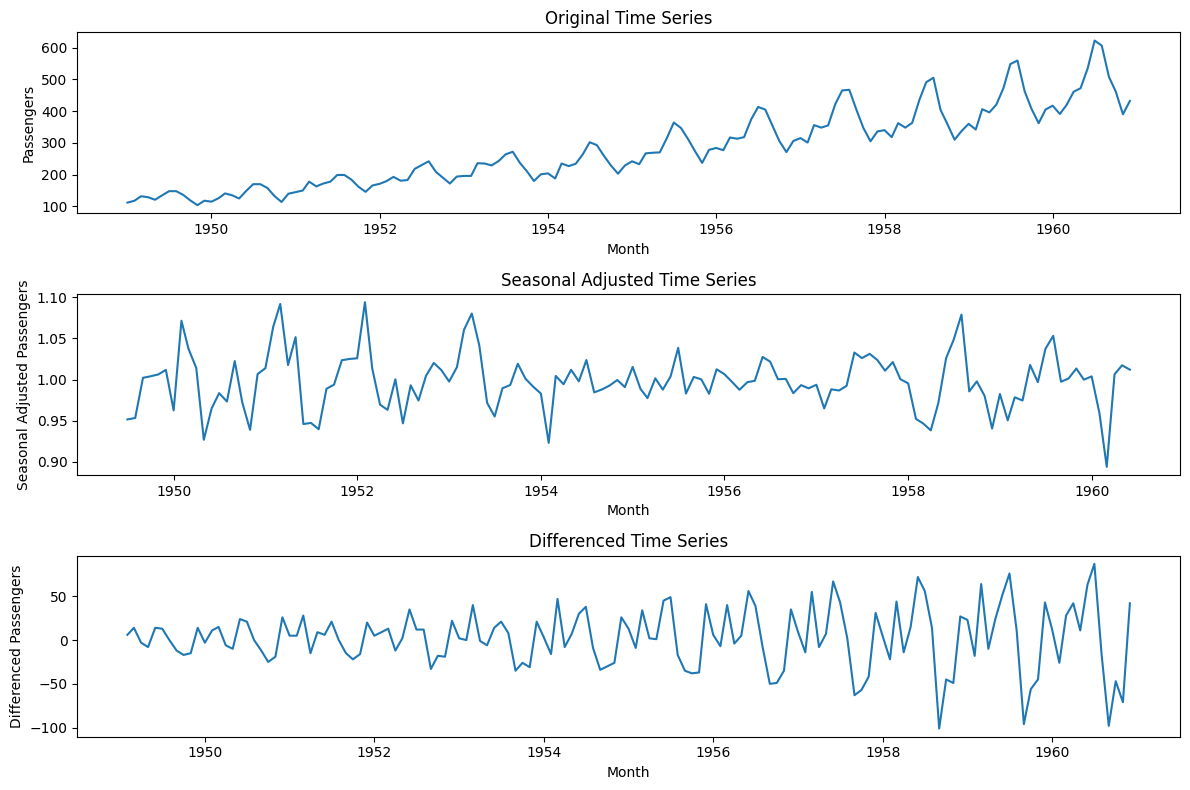

In [21]:
# Visualize the results
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(3, 1, 1)
plt.plot(df['#Passengers'])
plt.title('Original Time Series')
plt.xlabel('Month')
plt.ylabel('Passengers')

# Seasonal Adjusted
plt.subplot(3, 1, 2)
plt.plot(df['Seasonal Adjusted'])
plt.title('Seasonal Adjusted Time Series')
plt.xlabel('Month')
plt.ylabel('Seasonal Adjusted Passengers')

# Differenced
plt.subplot(3, 1, 3)
plt.plot(df['Differenced'])
plt.title('Differenced Time Series')
plt.xlabel('Month')
plt.ylabel('Differenced Passengers')

plt.tight_layout()
plt.show()

# Imputing Missing Data

In [22]:
# fillna(df.column.mean())
#fillna(df.column.median())
#fillna(method = 'bfill')
#fillna(method = 'ffill')
#interpolate(method = 'linear')
#interpolate(option = 'spline')

# Time Series Analysis & Decomposition Techniques

**Autocorrelation**

In [23]:
import yfinance as yf
import datetime

In [24]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf

In [25]:
startDate = datetime.datetime(2023,1, 18)
endDate = datetime.datetime(2024, 1, 17)
google = yf.Ticker("GOOGL")
 
google_df = google.history(start=startDate,end=endDate)

In [26]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-18 00:00:00-05:00,91.807191,92.464810,90.312609,90.790878,29116700,0.0,0.0
2023-01-19 00:00:00-05:00,90.392327,93.271888,90.302648,92.713913,37000400,0.0,0.0
2023-01-20 00:00:00-05:00,94.756496,97.944942,94.676783,97.665947,63191100,0.0,0.0
2023-01-23 00:00:00-05:00,97.596207,99.678662,97.147836,99.429565,40005100,0.0,0.0
2023-01-24 00:00:00-05:00,97.745664,99.250212,96.848913,97.347107,33078500,0.0,0.0


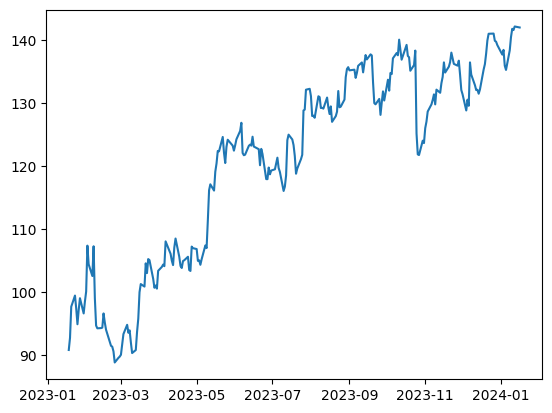

In [27]:
plt.plot(google_df['Close'])
plt.show()

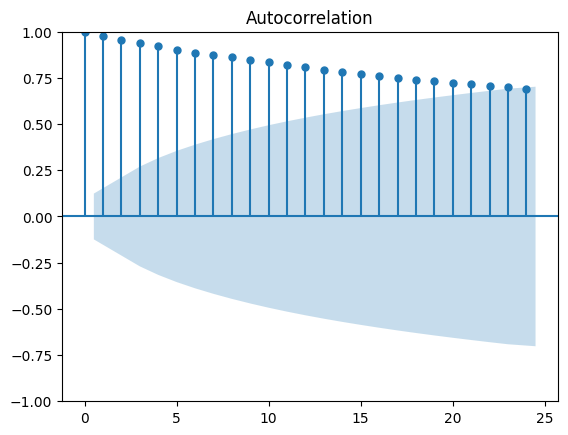

In [28]:
plot_acf(google_df['Close'], alpha = 0.05)
plt.show()

In [29]:
# Durbin-Watson Method
df_date_close = pd.DataFrame(google_df, columns = ['Date', 'Close'])
X = np.arange(len(df_date_close[['Close']]))
y = np.asarray(df_date_close[['Close']])
X = sm.add_constant(X)
ols_res = OLS(y,X).fit()
durbin_watson(ols_res.resid)

0.12977563949480853

**Seasonal Decomposition by Loess (STL)**

In [30]:
from statsmodels.tsa.seasonal import STL

In [31]:
df

,#Passengers,Seasonal Adjusted,Differenced
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,6.0
1949-03-01,132,NaN,14.0
1949-04-01,129,NaN,-3.0
1949-05-01,121,NaN,-8.0
...,...,...,...
1960-08-01,606,NaN,-16.0
1960-09-01,508,NaN,-98.0
1960-10-01,461,NaN,-47.0


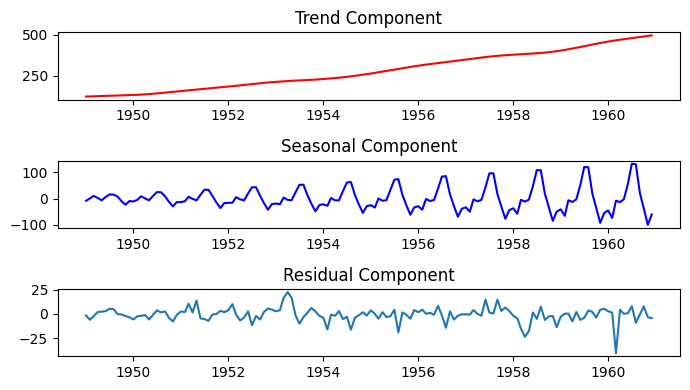

In [32]:
stl = STL(df['#Passengers'], seasonal = 13, robust = True)
result = stl.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (7,4))

ax1.plot(df.index, result.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(df.index, result.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(df.index, result.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

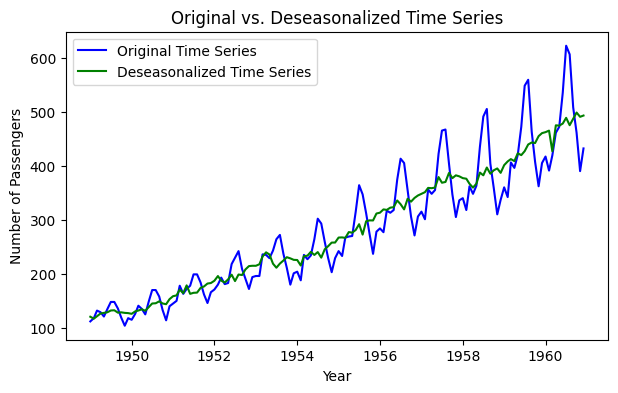

In [33]:
# Removing seasonal component

deseasonalized_series = df['#Passengers'] - result.seasonal

# visualize the comparative plot
plt.figure(figsize=(7, 4))
plt.plot(df.index, df['#Passengers'], label='Original Time Series', color='blue')
plt.plot(df.index, deseasonalized_series, label='Deseasonalized Time Series', color='green')
plt.title('Original vs. Deseasonalized Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

**Granger causality test**

In [34]:
startDate = datetime.datetime(2010,6, 30)
endDate = datetime.datetime(2020, 12, 18)
apple = yf.Ticker("AAPL")
walmart = yf.Ticker('WMT')
tesla = yf.Ticker('TSLA')
 
apple_df = apple.history(start=startDate,end=endDate)
wm_df = walmart.history(start=startDate,end=endDate)
ts_df = tesla.history(start=startDate,end=endDate)
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-30 00:00:00-04:00,7.733820,7.771779,7.531972,7.577764,739452000,0.0,0.0
2010-07-01 00:00:00-04:00,7.661218,7.676281,7.327414,7.485880,1022896000,0.0,0.0
2010-07-02 00:00:00-04:00,7.546434,7.559691,7.326811,7.439486,693842800,0.0,0.0
2010-07-06 00:00:00-04:00,7.561799,7.616027,7.415986,7.490399,615235600,0.0,0.0
2010-07-07 00:00:00-04:00,7.546435,7.795885,7.524142,7.792871,654556000,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-11 00:00:00-05:00,119.718795,120.041489,117.880431,119.699242,86939800,0.0,0.0
2020-12-14 00:00:00-05:00,119.885016,120.618408,118.848493,119.083176,79184500,0.0,0.0
2020-12-15 00:00:00-05:00,121.586488,125.067657,121.381139,125.048096,157243700,0.0,0.0


In [35]:
stock_df = pd.merge(apple_df[['Close']], wm_df[['Close']], on='Date', how='right').rename(columns = {'Close_x':'apple', 'Close_y':'walmart'})
stock_df = stock_df.merge(ts_df[['Close']], on='Date', how='right').rename(columns={'Close':'tesla'})

In [36]:
stock_df.index =  pd.to_datetime(stock_df.index)
stock_df = stock_df.rename_axis('company', axis=1)

stock_df.head()

company,apple,walmart,tesla
Date,,,
2010-06-30 00:00:00-04:00,7.577764,11.731291,1.588667
2010-07-01 00:00:00-04:00,7.485880,11.797187,1.464000
2010-07-02 00:00:00-04:00,7.439486,11.714209,1.280000
2010-07-06 00:00:00-04:00,7.490399,11.853317,1.074000
2010-07-07 00:00:00-04:00,7.792871,11.938731,1.053333


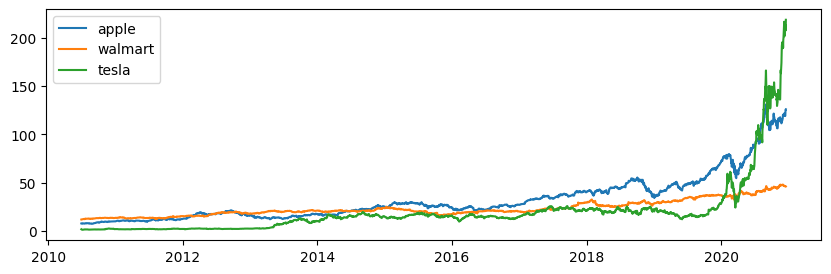

In [37]:
plt.figure(figsize = (10,3))
plt.plot(stock_df['apple'], label = 'apple')
plt.plot(stock_df['walmart'], label = 'walmart')
plt.plot(stock_df['tesla'], label = 'tesla')
plt.legend()
plt.show()

In [38]:
n_obs = 20
stock_df_train, stock_df_test = stock_df[0:-n_obs], stock_df[-n_obs:]

def adf_test(stock_df):
    result = adfuller(stock_df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('ADF Test: Apple time series')
adf_test(stock_df_train['apple'])
print('ADF Test: Walmart time series')
adf_test(stock_df_train['walmart'])
print('ADF Test: Tesla time series')
adf_test(stock_df_train['tesla'])

ADF Test: Apple time series
ADF Statistics: 2.883317
p-value: 1.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Test: Walmart time series
ADF Statistics: 1.662598
p-value: 0.998034
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Test: Tesla time series
ADF Statistics: 5.605485
p-value: 1.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [39]:
# KPSS test

from statsmodels.tsa.stattools import kpss

def kpss_test(stock_df):    
    statistic, p_value, n_lags, critical_values = kpss(stock_df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
        
print('KPSS Test: Apple time series')
kpss_test(stock_df_train['apple'])
print('KPSS Test: Walmart time series')
kpss_test(stock_df_train['walmart'])
print('KPSS Test: Tesla time series')
kpss_test(stock_df_train['tesla'])

KPSS Test: Apple time series
KPSS Statistic: 6.241351625097445
p-value: 0.01
num lags: 30
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Walmart time series
KPSS Statistic: 6.741275276791093
p-value: 0.01
num lags: 30
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Tesla time series
KPSS Statistic: 3.493791917064401
p-value: 0.01
num lags: 30
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-39-f593826f492d>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(stock_df.values)
<ipython-input-39-f593826f492d>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(stock_df.values)
<ipython-input-39-f593826f492d>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(stock_df.values)


In [40]:
# Difference Method

stock_df_train_transformed = stock_df_train.diff().dropna()

In [41]:
print('ADF Test: Apple time series transformed')
adf_test(stock_df_train_transformed['apple'])
print('ADF Test: Walmart time series transformed')
adf_test(stock_df_train_transformed['walmart'])
print('ADF Test: Tesla time series transformed')
adf_test(stock_df_train_transformed['tesla'])

ADF Test: Apple time series transformed
ADF Statistics: -8.946216
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Test: Walmart time series transformed
ADF Statistics: -10.795313
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Test: Tesla time series transformed
ADF Statistics: -8.370836
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [42]:
# Granger Causality Test

from statsmodels.tsa.stattools import grangercausalitytests

maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    stock_df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in stock_df.columns:
        for r in stock_df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            stock_df.loc[r, c] = min_p_value
    stock_df.columns = [var + '_x' for var in variables]
    stock_df.index = [var + '_y' for var in variables]
    return stock_df

grangers_causation_matrix(stock_df_train_transformed, variables = stock_df_train_transformed.columns)

,apple_x,walmart_x,tesla_x
apple_y,1.0,0.0,0.0
walmart_y,0.0,1.0,0.0
tesla_y,0.0,0.0,1.0


**The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), for example, take the value 0.0 in (row 1, column 2), we can reject the null hypothesis and conclude that walmart_x Granger causes apple_y. Likewise, the 0.0 in (row 2, column 1) refers to walmart_y Granger causes apple_x.

All the time series in the above data are interchangeably Granger causing each other.**